<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W1/ungraded_lab/C1_W1_Lab_1_hello_world_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMO: The Hello World of Deep Learning with Neural Networks

Source/Links:
+ [Arpan Goshal@Medium Blog](https://arpanghoshal.medium.com/the-hello-world-of-deep-learning-with-neural-networks-80d637261d87)


History:
+ Oct'2023 v1 dbe -- adapted for KETE HS23

---


### Introduction

Like every first app, you should start with something super simple that shows the overall scaffolding for how your code works. In the case of creating neural networks, one simple case is where it **learns the relationship between two numbers**.  

So, for example, if you were writing code for a function like this, you already know the 'rules':

In [1]:
def hello_world_function(x):
    y = (2 *x) -1
    return y

In [2]:
x = 4.5
print ("x= ",x, " => y= ", hello_world_function(x))

x=  4.5  => y=  8.0


How would you train a neural network to do the equivalent task?

By using data! By feeding it with a set of x's and y's, it should be able to figure out the relationship between them.

This is obviously a very different paradigm from what you might be used to. So let's step through it piece by piece.


In [3]:
x_series = []
y_series = []

for i in (3,5,7,11,13):
  x_series.append(i)
  y_series.append(hello_world_function(i))

print(x_series,"\n", y_series)

[3, 5, 7, 11, 13] 
 [5, 9, 13, 21, 25]


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# generate a 'dataframe' object withe the x/y series values
df = pd.Series(index =x_series,data=y_series).to_frame()

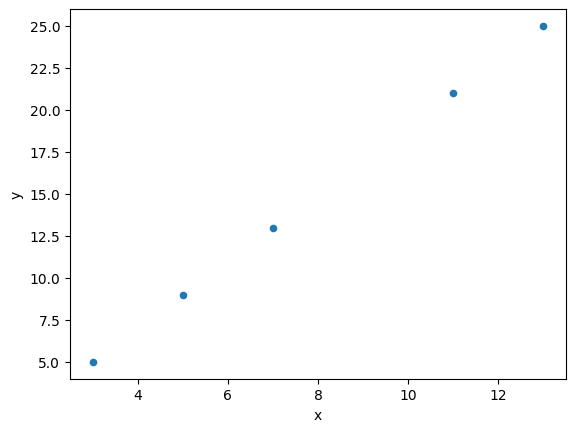

,x,y
0,3,5
1,5,9
2,7,13
3,11,21
4,13,25


In [5]:
# plot the x/y series values (i.e. the dataframe object)
df.reset_index(inplace=True)
df.columns = ['x','y']
df.plot(kind='scatter',x='x',y='y')
plt.show()

# show the x/y series values (i.e. the dataframe object) in tabular form
df.head()

---  
## A) Import Numpy and Prepare the Data

You further import a library called **numpy** -  calling it `np` for convention and ease of use - which helps to represent data as arrays easily and to optimize numerical operations.

Next up, you will feed in some data. In this case, you are taking 6 `x's` and 6 `y's`. You can see that the relationship between these is `y=2x-1`, so where `x = -1`, `y=-3` etc.

The de facto standard way of declaring model inputs and outputs is to use [numpy](https://numpy.org/), a Python library that provides lots of array type data structures. You can specify these values by building numpy arrays with [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [6]:
import numpy as np

# Declare model inputs and outputs - arrays - for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## B) Import Deep Learning Libraries

Here, you are importing [TensorFlow](https://www.tensorflow.org/) and calling it `tf` for convention and ease of use.

The framework you will use to build a neural network as a sequence of layers is called [`keras`](https://keras.io/) so you will import that too.


In [7]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.17.0


## C) Define and Compile the Neural Network

Next, you will create the simplest possible neural network. It has **1 layer with 1 neuron** (see [Perceptron](https://medium.com/@ilyurek/perceptron-model-the-foundation-of-neural-networks-4db25b0148d)), and the input shape to it is just 1 value.

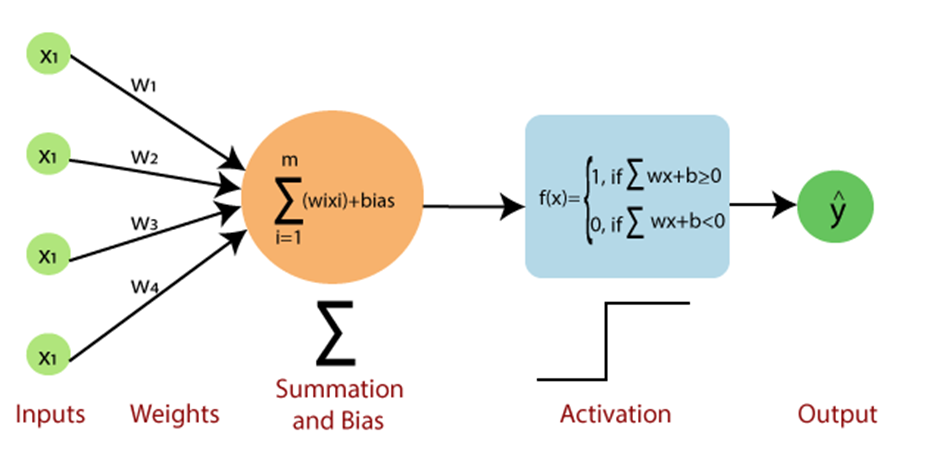

You will build this model using Keras' [Sequential](https://keras.io/api/models/sequential/) class which allows you to define the network as a sequence of [layers](https://keras.io/api/layers/). You can use a single [Dense](https://keras.io/api/layers/core_layers/dense/) layer to build this simple network as shown below:

In [8]:
# Build a simple Sequential model
model = tf.keras.Sequential([
        keras.layers.Dense(units=1, input_shape=[1])
        ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now, you will compile the neural network. When you do so, you have to specify 2 functions: a [loss](https://keras.io/api/losses/) and an [optimizer](https://keras.io/api/optimizers/).

If you've seen lots of math for machine learning, here's where it's usually used. But in this case, it's nicely encapsulated in functions and classes for you. But what happens here? Let's explain...

You know that in the function declared at the start of this notebook, the relationship between the numbers is `y=2x-1`. When the computer is trying to 'learn' that, it makes a guess... maybe `y=10x+10`. The `loss` function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the `optimizer` function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with something like `y=5x+5`, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower).

It will repeat this for the number of _epochs_ which you will see shortly. But first, here's how you will tell it to use [mean squared error](https://keras.io/api/losses/regression_losses/#meansquarederror-function) for the loss and [stochastic gradient descent](https://keras.io/api/optimizers/sgd/) for the optimizer. You don't need to understand the math for these yet, but you can see that they work!

Over time, you will learn the different and appropriate loss and optimizer functions for different scenarios.


In [9]:
# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='sgd')

In [10]:
# Show the model characteristics
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## D) Train the Neural Network

The process of training the neural network, where it 'learns' the relationship between the x's and y's is in the [`model.fit()`](https://keras.io/api/models/model_training_apis/#fit-method)  call.   

This is where it will go through the loop we spoke about above: making a guess, measuring how good or bad it is (aka the loss), using the optimizer to make another guess etc. It will do it for the number of `epochs` you specify. When you run this code, you'll see the loss on the right hand side.

In [11]:
# Train the model
model.fit(xs, ys, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - loss: 5.8374
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.7741
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.9339
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.2691
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.7426
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.3248
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.9927
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.7280
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.5165
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.3469
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.2103
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.0997
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.0097
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.9359
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8749
Epoch 16/100
1/1 ━

## E) Apply trained Neural Network (predict)  

 Ok, now you have a model that has been trained to learn the relationship between `x` and `y`. You can use the [`model.predict()`](https://keras.io/api/models/model_training_apis/#predict-method) method to have it figure out the `y` for a previously unknown `x`.   

 So, for example, if `x=10`, what do you think `y` will be? Take a guess before you run this code:

In [23]:
import numpy as np  # Import NumPy for array manipulation

# Make a prediction by using the trained model and applying it to new x-values

x_new = 10
x_new_array = np.array([x_new])  # Convert the integer to a NumPy array

y_new = model.predict(x_new_array)

print("x_new= ", x_new, "y_new= ", y_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
x_new=  10 y_new=  [[17.986284]]


You might have thought `19`, right? But it ended up being a little under. Why do you think that is?

---  
Remember that neural networks *deal with probabilities*. So given the data that we fed the model with, it calculated that there is a very high probability that the relationship between `x` and `y` is `y=2x-1`, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

> **As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification**
